In [5]:
import requests 

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

from bs4 import BeautifulSoup
from collections import Counter
import yfinance as yf

In [21]:
tickers = []
response = requests.get('https://in.finance.yahoo.com/most-active')
soup = BeautifulSoup(response.content, 'lxml')

for item in soup.select('.simpTblRow'):
    tickers.append(item.select('[aria-label=Symbol]')[0].get_text())
    
skip = ['UVSL.NS', 'VISESHINFO.NS', 'ZOMATO.NS', 'LAKSHVILAS.NS']
for item in skip:
    tickers.remove(item)

df = pd.DataFrame()

for ticker in tickers:
    df[ticker] = yf.download(tickers = ticker, period = '3mo')['Adj Close']

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,IDEA.NS,YESBANK.NS,IDEA.BO,SAIL.NS,IDFCFIRSTB.NS,JPPOWER.NS,UJJIVANSFB.NS,PNB.NS,BANKBARODA.NS,SUZLON.NS,...,VEDL.NS,NATIONALUM.NS,TATAMOTORS.NS,VAKRANGEE.NS,NMDC.NS,TATAPOWER.NS,TATASTEEL.NS,YESBANK.BO,FORTIS.NS,SBIN.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-20,8.40,13.25,8.40,121.449997,55.150002,3.45,29.950001,37.500000,76.500000,5.50,...,275.799988,71.650002,307.700012,48.768372,178.699997,101.683044,1080.862061,13.27,221.399994,381.032104
2021-05-21,8.55,13.35,8.57,122.000000,57.250000,3.60,29.799999,38.049999,80.800003,5.45,...,273.649994,70.800003,313.100006,47.571602,176.199997,103.609055,1088.735840,13.34,227.500000,397.529816
2021-05-24,8.60,13.85,8.60,124.750000,59.250000,3.75,30.000000,39.799999,81.349998,5.45,...,274.950012,73.199997,311.850006,47.521736,182.850006,105.979523,1068.097656,13.86,227.149994,408.280518
2021-05-25,8.55,13.60,8.54,123.949997,58.950001,3.90,29.799999,39.349998,80.849998,5.40,...,273.899994,72.599998,315.250000,47.072948,181.649994,106.127670,1081.008667,13.60,225.649994,408.577789
2021-05-26,8.55,13.45,8.55,118.750000,57.799999,4.05,29.900000,39.250000,80.599998,5.90,...,268.850006,71.800003,315.500000,44.729271,177.100006,104.794281,1058.463379,13.46,227.250000,409.766815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-13,6.30,11.90,6.32,133.949997,45.500000,4.40,25.700001,37.750000,80.949997,6.50,...,328.649994,83.750000,307.250000,38.246769,171.750000,132.550003,1461.650024,11.89,236.500000,431.200012
2021-08-16,5.95,11.70,5.97,134.500000,44.849998,4.20,25.350000,37.450001,79.500000,6.65,...,336.500000,83.199997,303.700012,37.249458,172.399994,132.100006,1519.400024,11.72,257.700012,424.850006
2021-08-17,5.75,11.25,5.74,130.000000,44.150002,4.00,24.500000,36.750000,78.050003,6.35,...,303.149994,80.699997,297.700012,37.199596,167.500000,131.100006,1503.699951,11.27,264.600006,421.500000


In [23]:
log_ret = np.log(df / df.shift(1)) 
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):

    weights = np.array(np.random.random(21))
    weights = weights / np.sum(weights)
    all_weights[x, :] = weights
    ret_arr[x] = np.sum((log_ret.mean() * weights * 100))
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 100, weights)))
    sharpe_arr[x] = ret_arr[x] / vol_arr[x]
    
print('Max Sharpe ratio : {}'.format(sharpe_arr.max()))
print('Location in array: {}'.format(sharpe_arr.argmax()))

Max Sharpe ratio : 0.12375705907302682
Location in array: 3229


In [24]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
all_weights[3229, :] 

array([0.00410785, 0.00884237, 0.00057067, 0.02323758, 0.01942339,
       0.0903072 , 0.0196617 , 0.07017968, 0.01256298, 0.06300216,
       0.04623799, 0.04337722, 0.09091797, 0.01780223, 0.06317819,
       0.08723504, 0.07577508, 0.10437518, 0.00022352, 0.09386847,
       0.06511351])

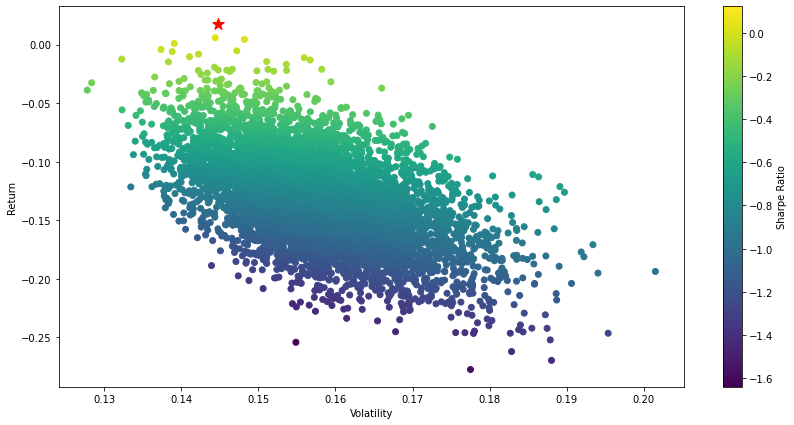

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 7))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, marker = '*', c = 'red', s = 150)
plt.show()

In [31]:
weights = all_weights[3229, :]

dict_wieght = {}
for ticker, weight in zip(tickers, weights):
    dict_wieght[ticker] = weight

for i in Counter(dict_wieght).most_common(10): 
    print(i[0], " :", i[1], " ")

TATASTEEL.NS  : 0.10437518490385105  
FORTIS.NS  : 0.0938684692498903  
NATIONALUM.NS  : 0.0909179700651484  
JPPOWER.NS  : 0.09030720130043184  
NMDC.NS  : 0.08723504077077396  
TATAPOWER.NS  : 0.07577508466285748  
PNB.NS  : 0.0701796767174726  
SBIN.NS  : 0.06511351079313722  
VAKRANGEE.NS  : 0.06317818613955382  
SUZLON.NS  : 0.06300216001444421  


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

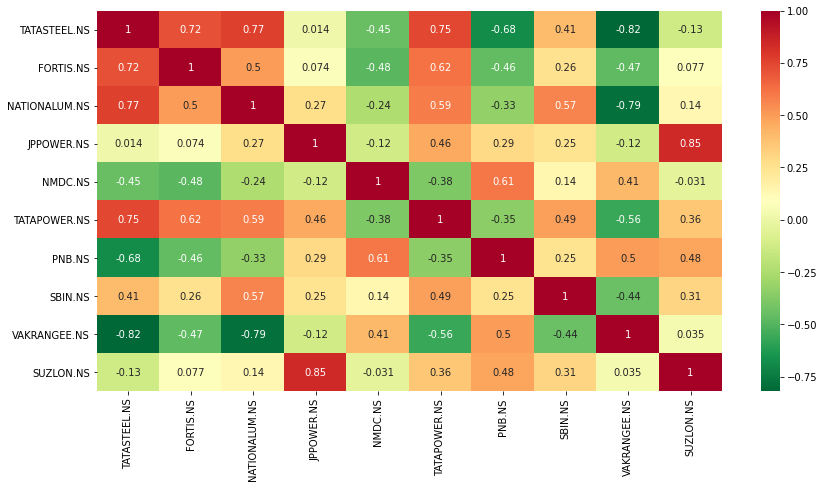

In [33]:
updatedtickers = []

for i in Counter(dict_wieght).most_common(10):
    updatedtickers.append(i[0])
    
updated_df = pd.DataFrame()

for ticker in updatedtickers:
    updated_df[ticker] = yf.download(tickers = ticker, period = '3mo')['Adj Close']
    
corr_df = updated_df.corr(method = 'pearson') 
corr_df.head().reset_index()

plt.figure(figsize = (14, 7))
sns.heatmap(corr_df, annot = True, cmap = 'RdYlGn_r')

In [37]:
uncorr = ['TATASTEEL.NS', 'NATIONALUM.NS', 'VAKRANGEE.NS', 'TATAPOWERS.NS', 'PNB.NS']